# Задача 2

In [5]:
%matplotlib inline
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import collections
import math


def sample_mean(ls):
    return sum(ls) / len(ls)


def sample_varience_unbiased(ls):
    mean = sample_mean(ls)
    i = 0
    for e in ls:
        i += (mean - e)**2
    return i / (len(ls) - 1)


def print_iterable(iterable, in_one_line):
    if not isinstance(iterable, collections.Iterable):
        raise TypeError("Argument should be iterable")
    iter = 0
    for i in iterable:
        iter += 1
        print(i, '\t', end='')
        if iter % in_one_line == 0:
            print()

# Generates needed selection of random variable X (X - param ~ t4)


def gen_selection(freedom_degr, param, size):
    sel = st.t.rvs(df=freedom_degr, size=size)
    sel = [i + param for i in sel]
    return sel

# Tests provided selection's sample mean with population mean at the
# significance level


def test_mean(sel, pop_mean, level):
    n = len(sel)
    s_mean = sample_mean(sel)
    sigma = sample_varience_unbiased(sel)
    left_border = st.t.ppf(level / 2, n - 1)
    right_border = st.t.ppf(1 - level / 2, n - 1)
    statistic = (s_mean - pop_mean) * (n**(1 / 2)) / sigma
    return left_border <= statistic <= right_border

# Computes probability of type I error


def type_1_error(repeats, sel_size, freedom_degr, param, hyp_mean, level):
    errors = 0
    for i in range(repeats):
        if not test_mean(gen_selection(freedom_degr, param, sel_size), hyp_mean, level):
            errors += 1
    return errors / repeats


def power_function(repeats, sel_size, freedom_degr, hyp_mean, level):
    print("Mean\t|\tProbability to reject H0")
    params = []
    probs = []
    for i in range(10, 51, 5):
        param = i / 10
        prob = type_1_error(repeats, sel_size, freedom_degr,
                            param, hyp_mean, level)
        params.append(param)
        probs.append(prob)
        print(param, "\t|\t", prob)
    plt.plot(params, probs)
    plt.show()

# Выборка объёма 8:

In [6]:
estimate = 3
freedom_d = 4
selection8 = gen_selection(freedom_d, estimate, 8)

In [7]:
print_iterable(selection8, 4)

2.04207894929 	2.74571137873 	4.62935018371 	2.1065190042 	
0.00844580379066 	3.14480125791 	2.81456631155 	1.9411241558 	


Проверка на уровне значимости 5% гипотезы о равенстве мат. ожидания трём:

In [8]:
print(test_mean(selection8, 3, 0.05))

True


Повторим эксперимент 10 000 раз и оценим вероятность ошибки первого рода: 

In [9]:
print("Probability of type I error is: ",
      type_1_error(10000, 8, 4, 3, 3, 0.05))

Probability of type I error is:  0.0694


Оценим функцию мощности используемого критерия:

Mean	|	Probability to reject H0
1.0 	|	 0.7417
1.5 	|	 0.5985
2.0 	|	 0.4018
2.5 	|	 0.1752
3.0 	|	 0.0709
3.5 	|	 0.1727
4.0 	|	 0.3983
4.5 	|	 0.604
5.0 	|	 0.738


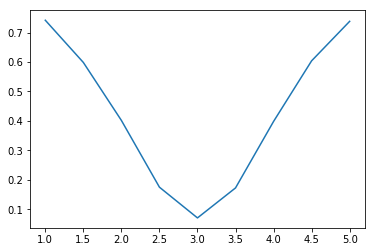

In [10]:
power_function(10000,8,4,3,0.05)

# Выборка объёма 50:

In [11]:
estimate = 3
freedom_d = 4
selection50 = gen_selection(freedom_d, estimate, 50)
print_iterable(selection50, 5)

0.939233701003 	2.47244598128 	4.41157289743 	5.31399709172 	3.28372431221 	
3.74032527977 	1.17380314725 	3.61373613512 	3.31570783733 	0.452521116248 	
4.72337293573 	1.64245277619 	3.72987150499 	3.06794684725 	3.07409179706 	
2.1386754358 	2.8381759569 	0.762475723409 	2.69962012602 	2.00829844275 	
1.13056347741 	4.01009349845 	2.817626697 	5.18980980009 	3.62914498212 	
3.33029751163 	1.32880822845 	1.46834997696 	3.62673671041 	3.67000355926 	
2.36466769495 	2.89521430854 	3.70968745153 	3.61758172106 	6.40752998293 	
3.11928486309 	3.25666733769 	3.03641067677 	2.84092626615 	3.20023515296 	
3.02673458399 	3.89414868727 	1.65836601734 	3.5401348837 	1.63270155209 	
1.81817328757 	3.91759304357 	5.23536697648 	3.33801097891 	3.11995604361 	


Проверка на уровне значимости 5% гипотезы о равенстве мат. ожидания трём:

In [12]:
print(test_mean(selection50, 3, 0.05))

True


Повторим эксперимент 10 000 раз и оценим вероятность ошибки первого рода: 

In [13]:
print("Probability of type I error is: ",
      type_1_error(10000, 50, 4, 3, 3, 0.05))

Probability of type I error is:  0.0174


Оценим функцию мощности используемого критерия:

Mean	|	Probability to reject H0
1.0 	|	 0.9942
1.5 	|	 0.986
2.0 	|	 0.9268
2.5 	|	 0.47
3.0 	|	 0.0163
3.5 	|	 0.4612
4.0 	|	 0.921
4.5 	|	 0.9848
5.0 	|	 0.9943


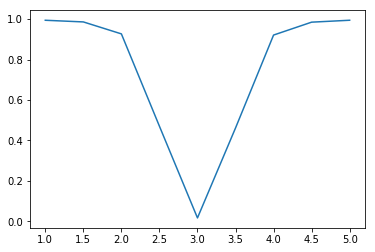

In [14]:
power_function(10000,50,4,3,0.05)